# Problem Statement

The Board of Directors at TCB General Contractors are implementing a new marketing strategy to increase the company's revenue. To implement this new strategy, they want to discover which of their services are most impactful on increasing the value of the home. This information will be used to promote specific additions and renovations in the upcoming marketing plan.

My task is to discover which home services most dramatically effect the sales price.

As the output of my project will be the numeric 'Sale Price', I will use linear regression and multiple linear regression modeling algorithm to evaluate the data given to me.

The success of my modeles will be evaluated by the regression metric 𝑅2. I will use R2 as it is easily interpratable and does not depend on the scale of "Sales Price".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

In [2]:
train = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/train.csv')
test = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/test.csv')

# Data Cleaning & Exploring

In [3]:
train.shape, test.shape

((2051, 81), (878, 80))

In [4]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


**Checking Column Datatypes**

**Discovering what each column represents**

In [5]:
#http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

**TCB General Contracting services that corrilate to the data:**

- Complete home upgrade: 'Overall Cond', 'Overall Qual'

- 2nd floor addition: '2nd Flr SF', 'Bedroom AbvGr', 'MS SubClass'(060),'House Style':(2Story)(2.5Fin), 'Gr Liv Area',  'TotRmsAbvGrd'

- Basement Finish:'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',

- Kitchen Remodel:'Kitchen AbvGr', 'Kitchen Qual'

- Bathroom Addition: 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'

- Garage Addition: 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars','Garage Area', 'Garage Qual', 'Garage Cond'

- Deck Addition: 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch'

**Dropping columns with less than 150 observations**

In [6]:
test.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)
train.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

**Dropping irrelevant columns**


In [7]:
train.drop(columns=['MS Zoning','Lot Frontage','Lot Area','Street','Lot Shape','Land Contour', 'Utilities',
                    'Lot Config', 'Land Slope', 'Neighborhood','Condition 1', 'Condition 2','Pool Area', 
                    'Mo Sold','Sale Type','Misc Val','Heating','Heating QC','Central Air','Electrical','Functional',
                    'Foundation','Bldg Type','Bsmt Qual'], inplace=True)

test.drop(columns=['MS Zoning','Lot Frontage','Lot Area','Street','Lot Shape','Land Contour', 'Utilities',
                   'Lot Config', 'Land Slope', 'Neighborhood','Condition 1', 'Condition 2','Pool Area', 
                   'Mo Sold','Sale Type','Misc Val','Heating','Heating QC','Central Air','Electrical','Functional',
                   'Foundation','Bldg Type','Bsmt Qual'], inplace=True)

### Imputing null values

In [8]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Yr Blt       114
Garage Finish       114
Garage Cars     

**Determining what missing values mean.**

Column_name: #of nulls/data type: column_description: null_description
- Fence: 1651 object: No Fence
- Garage Qual: 114/object: Garage quality: No Garage
- Garage Cond: 114/object: Garage condition: No Garage
- Fireplace Qu: 1000/object: Fireplace quality: No Fireplace
- Garage Type: 113/object: Garage location: No Garage
- Garage Finish: 114/object: Interior finish of the garage: No Garage
- Bsmt Qual: 55/object: Evaluates the height of the basement: No Basement
- Bsmt Cond: 55/object: Evaluates the general condition of the basement: No Basement
- Bsmt Exposure: 58/object: Walkout or garden level walls: No Basement
- BsmtFin Type 1: 55/object: No Basement
- Lot Frontage: 330/float: Linear feet of street connected to property
- Garage Yr Blt: 114/float: Year garage was built

In [9]:
#Imputing mean for Garage Cars null values

train['Garage Cars'].fillna(train['Garage Cars'].mean(), inplace = True)
test['Garage Cars'].fillna(test['Garage Cars'].mean(), inplace = True)

In [10]:
#Imputing mean for Bsmt Full Bath null values

train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].mean(), inplace = True)
test['Bsmt Full Bath'].fillna(test['Bsmt Full Bath'].mean(), inplace = True)

In [11]:
#Imputing mean for Bsmt Half Bath null values

train['Bsmt Half Bath'].fillna(train['Bsmt Half Bath'].mean(), inplace = True)
test['Bsmt Half Bath'].fillna(test['Bsmt Half Bath'].mean(), inplace = True)

In [12]:
#Exploring Total Bsmt SF and Imputing 0 for null values
train['Total Bsmt SF'].sort_values()


train.replace({'Total Bsmt SF': np.nan}, {'Total Bsmt SF': 0}, inplace = True)
test.replace({'Total Bsmt SF': np.nan}, {'Total Bsmt SF': 0}, inplace = True)

In [13]:
#Exploring Garage Area and Imputing mean for null values  
train['Garage Area'].describe()

train['Garage Area'].fillna(train['Garage Area'].mean(), inplace = True)
test['Garage Area'].fillna(test['Garage Area'].mean(), inplace = True)

In [14]:
train['BsmtFin SF 1'].describe()
train['BsmtFin SF 1'].sort_values()

train['BsmtFin SF 1'].fillna(train['BsmtFin SF 1'].mean(), inplace = True)
test['BsmtFin SF 1'].fillna(test['BsmtFin SF 1'].mean(), inplace = True)

In [15]:
train['BsmtFin SF 2'].describe()
train['BsmtFin SF 2'].sort_values()

train['BsmtFin SF 2'].fillna(train['BsmtFin SF 2'].mean(), inplace = True)
test['BsmtFin SF 2'].fillna(test['BsmtFin SF 2'].mean(), inplace = True)

In [16]:
train['Mas Vnr Area'].describe()

train.replace({'Mas Vnr Area': np.nan}, {'Mas Vnr Area': 0}, inplace = True)
test.replace({'Mas Vnr Area': np.nan}, {'Mas Vnr Area': 0}, inplace = True)

In [17]:
train['Bsmt Cond'].describe()
train['Bsmt Cond'].value_counts()
train['Bsmt Cond'].sort_values()

train.dropna(subset= ['Bsmt Cond'], inplace = True) 
test.dropna(subset= ['Bsmt Cond'], inplace = True) 

In [18]:
train['BsmtFin Type 2'].describe()
train['BsmtFin Type 2'].sort_values()

train.dropna(subset= ['BsmtFin Type 2'], inplace = True) 
test.dropna(subset= ['BsmtFin Type 2'], inplace = True) 

In [19]:
train['BsmtFin Type 1'].describe()
train['BsmtFin Type 1'].sort_values()

train.dropna(subset= ['BsmtFin Type 1'], inplace = True) 
test.dropna(subset= ['BsmtFin Type 1'], inplace = True) 

In [20]:
train['Bsmt Exposure'].describe()
train['Bsmt Exposure'].sort_values()

train.dropna(subset= ['Bsmt Exposure'], inplace = True) 
test.dropna(subset= ['Bsmt Exposure'], inplace = True) 

In [21]:
train['Garage Type'].describe()
train['Garage Type'].value_counts()
train['Garage Type'].sort_values()

train.replace({'Garage Type': np.nan}, {'Garage Type': 'N/A'}, inplace = True)
test.replace({'Garage Type': np.nan}, {'Garage Type': 'N/A'}, inplace = True)

In [22]:
train['Garage Finish'].describe()
train['Garage Finish'].sort_values()

train.replace({'Garage Finish': np.nan}, {'Garage Finish': 'N/A'}, inplace = True)
test.replace({'Garage Finish': np.nan}, {'Garage Finish': 'N/A'}, inplace = True)

In [23]:
train['Garage Qual'].describe()
train['Garage Qual'].sort_values()

train.replace({'Garage Qual': np.nan}, {'Garage Qual': 'N/A'}, inplace = True)
test.replace({'Garage Qual': np.nan}, {'Garage Qual': 'N/A'}, inplace = True)

In [24]:
train['Garage Cond'].describe()
train['Garage Cond'].sort_values()

train.replace({'Garage Cond': np.nan}, {'Garage Cond': 'N/A'}, inplace = True)
test.replace({'Garage Cond': np.nan}, {'Garage Cond': 'N/A'}, inplace = True)

In [25]:
#Exploring Garage Yr Blt
#I assume Nan's mean there is no garage so I will not impute or delete.
#I will delete column instead since I dont need this
train['Garage Yr Blt'].sort_values()

train.drop(columns=['Garage Yr Blt'], inplace=True)
test.drop(columns=['Garage Yr Blt'], inplace=True)

### Checking Data Types

In [26]:
train.dtypes

#Will dummy object columns below

Id                   int64
PID                  int64
MS SubClass          int64
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Fireplaces           int64
F

### Identifying Outliers

In [27]:
#Identify outliers
#code inspiration from: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

def find_outliers(Q1, Q3, data):
# Q3 = 75%
# Q1 = 25%
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5* IQR)
    lower_limit = Q1 - (1.5 * IQR)
    
    lower_outliers = []
    upper_outliers = []
    
    for outlier in data:
        if outlier > upper_limit: 
            upper_outliers.append(outlier)
        if outlier < lower_limit:
            lower_outliers.append(outlier)
    
    print(f'Lower outliers are: {sorted(lower_outliers)}')
    print(f'Upper outliers are: {sorted(upper_outliers)}')

**Noticing any unusual positive of negative numbers.**

In [28]:
train.describe()

,Id,PID,MS SubClass,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Yr Sold,SalePrice
count,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,1473.443775,7.114068e+08,56.987952,6.167169,5.576807,1972.131024,1984.656124,100.575301,454.614458,49.114960,581.819277,1085.548695,1165.219378,332.995984,5.546687,1503.762048,0.439257,0.065261,1.576305,0.378514,2.847892,1.033133,6.436245,0.600904,1.785028,475.869815,95.706827,48.290161,22.345382,2.668173,16.670181,2007.772590,183451.543675
std,843.430425,1.886440e+08,42.891344,1.386839,1.102084,30.264420,20.852998,175.747586,461.432475,166.906851,440.071445,417.384046,393.256862,426.403038,51.607391,497.842207,0.524943,0.255051,0.548227,0.502430,0.813902,0.187255,1.550733,0.640080,0.759336,214.933135,129.236103,66.600680,59.812718,25.596703,57.490542,1.311002,79049.128091
min,1.000000,5.263011e+08,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,160.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,748.750000,5.284562e+08,20.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,239.750000,812.750000,879.000000,0.000000,0.000000,1137.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,325.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,130000.000000
50%,1486.500000,5.354503e+08,50.000000,6.000000,5.000000,1975.000000,1993.500000,0.000000,384.000000,0.000000,485.000000,1008.000000,1093.000000,0.000000,0.000000,1451.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,2008.000000,164945.000000
75%,2195.500000,9.071751e+08,70.000000,7.000000,6.000000,2001.000000,2004.000000,163.000000,742.500000,0.000000,816.000000,1331.250000,1407.500000,700.000000,0.000000,1730.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,2009.000000,215000.000000
max,2930.000000,9.241520e+08,190.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,2010.000000,611657.000000


In [29]:
train.describe(include=np.object)

,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Kitchen Qual,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Fence
count,1992,1992,1992,1992,1992,1970,1992,1992,1992,1992,1992,1992,1992,1037,1992,1992,1992,1992,1992,394
unique,8,6,6,15,15,4,4,5,5,4,6,6,4,5,7,4,6,6,3,4
top,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,TA,No,GLQ,Unf,TA,Gd,Attchd,Unf,TA,TA,Y,MnPrv
freq,1016,1564,1966,714,710,1167,1199,1727,1830,1338,614,1746,1003,516,1189,811,1787,1823,1824,225


**Looking at histograms to see how column data is distributed. Noticing any tails that would indicate outliers.**


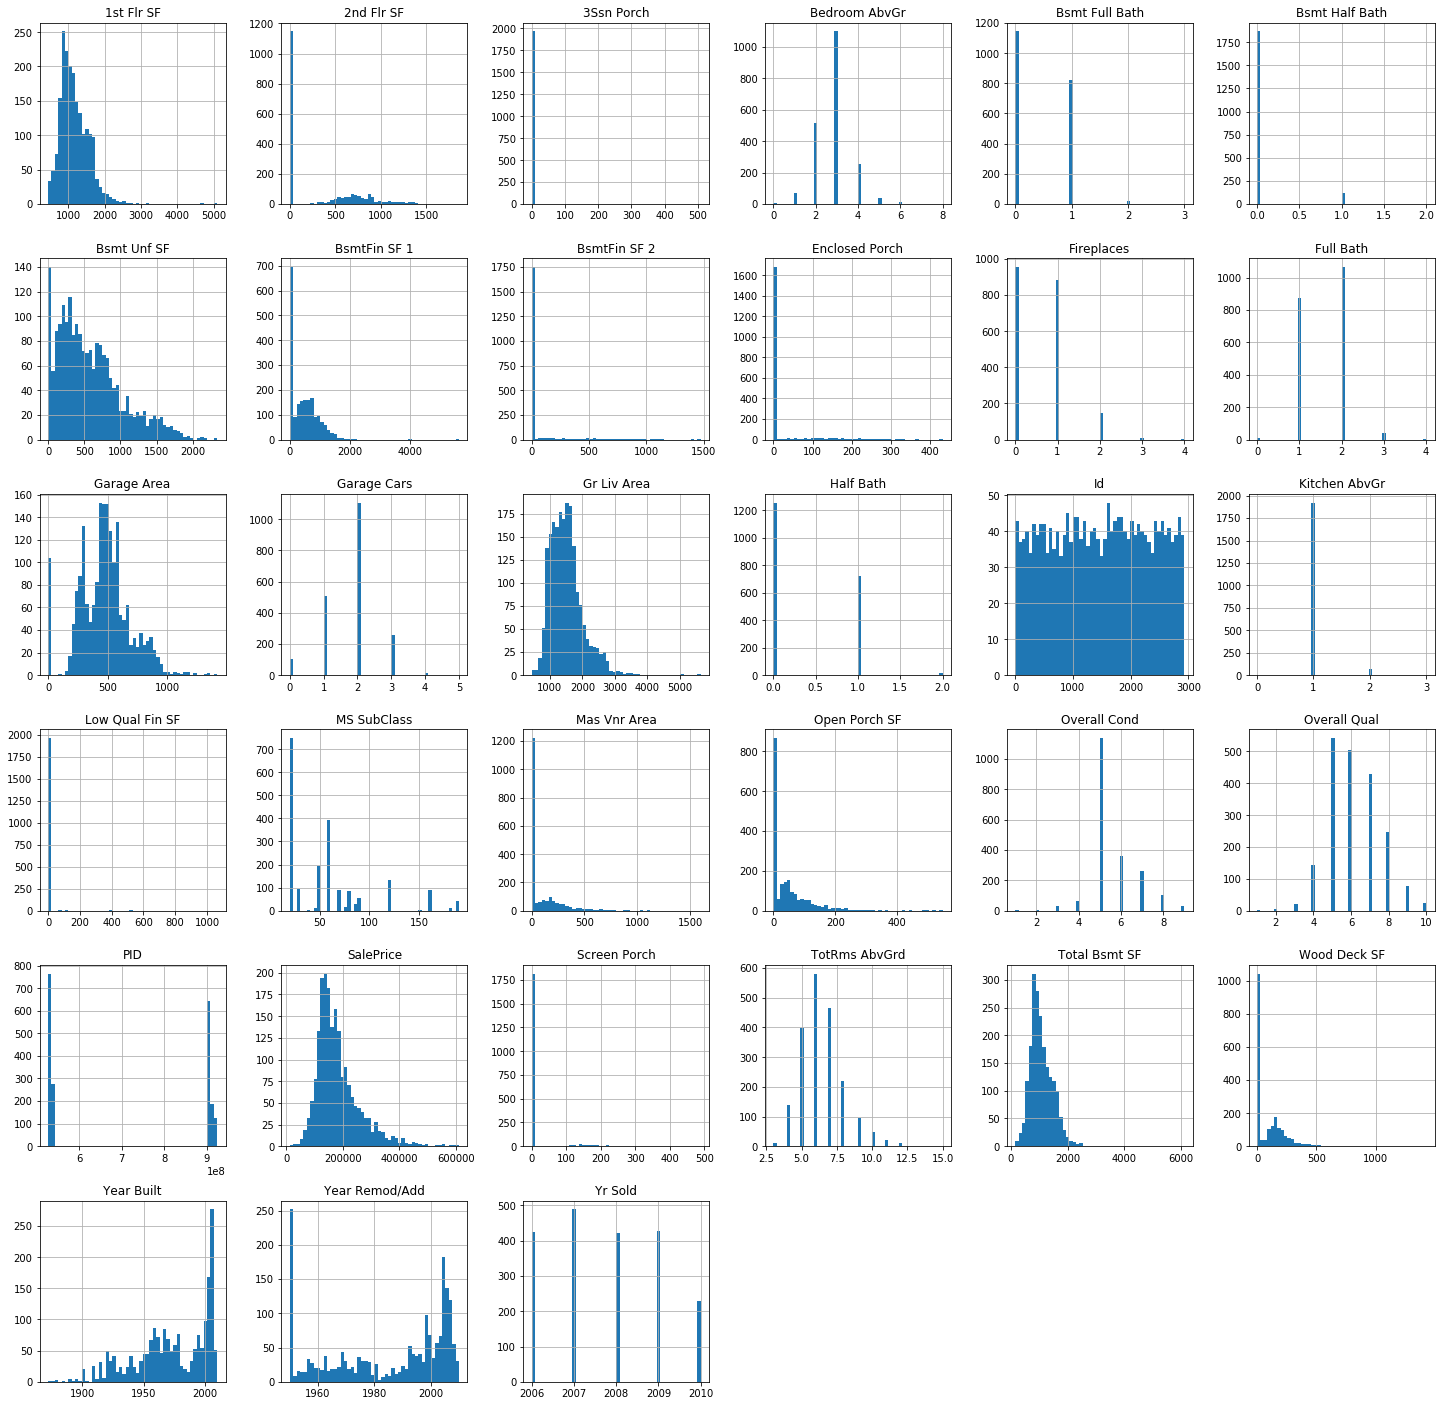

In [30]:
train.hist(bins=50, figsize=(25,25))
plt.savefig("attribute_histogram_plots")
plt.show()

**Boxplotting trouble histogram columns to better see outliers**

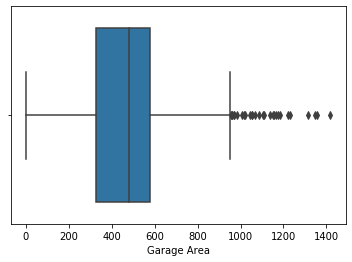

In [31]:
sns.boxplot(x=train['Garage Area']) 

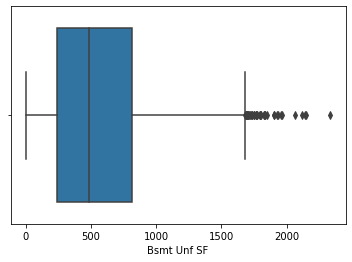

In [32]:
sns.boxplot(x=train['Bsmt Unf SF']) 

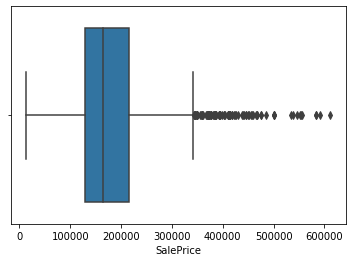

In [33]:
sns.boxplot(x=train['SalePrice'])

In [34]:
train['SalePrice'].describe()

count      1992.000000
mean     183451.543675
std       79049.128091
min       12789.000000
25%      130000.000000
50%      164945.000000
75%      215000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [35]:
find_outliers(129825, 214000, train['SalePrice'])

#total count 2051
#total upper outliers = 94

Lower outliers are: []
Upper outliers are: [341000, 342000, 342643, 344133, 345000, 345000, 345474, 348000, 349265, 350000, 350000, 350000, 350000, 355000, 356383, 359900, 360000, 360000, 361919, 367294, 370000, 370000, 370878, 370967, 372000, 372397, 372402, 373000, 374000, 375000, 376162, 377426, 377500, 380000, 382500, 383000, 383970, 385000, 385000, 386250, 387000, 392000, 392000, 392500, 394617, 395000, 395039, 398800, 402000, 403000, 404000, 410000, 410000, 410000, 412083, 412500, 415000, 415000, 415298, 417500, 418000, 421250, 425000, 426000, 430000, 438780, 440000, 441929, 445000, 446261, 450000, 451950, 455000, 457347, 460000, 465000, 466500, 468000, 475000, 475000, 485000, 500000, 500067, 501837, 535000, 538000, 545224, 552000, 555000, 556581, 582933, 584500, 591587, 611657]


Dont want to remove outliers as there are so many and TCB contracting will get jobs from houses with higher price points. Decision made to log salesprice if needed before testing for more accutate results.

## Data Exploration: combining features and interaction terms 

In [36]:
#Creating price per sq ft to compare to price

train['TotalLivingSF'] = train['Gr Liv Area'] + train['Total Bsmt SF'] - train['Low Qual Fin SF']
test['TotalLivingSF'] = test['Gr Liv Area'] + test['Total Bsmt SF'] - test['Low Qual Fin SF']

In [37]:
#Creating SqFt + Quality column

train['SqFt Interaction Qual'] = train['TotalLivingSF'] * train['Overall Qual']
test['SqFt Interaction Qual'] = test['TotalLivingSF'] * test['Overall Qual']

In [38]:
#Creating Total Bath column

half_bath_total = (train['Bsmt Half Bath'] + train['Half Bath'])/2
train['TotalBath'] = train['Bsmt Full Bath'] + train['Full Bath'] + half_bath_total

half_bath_total = (test['Bsmt Half Bath'] + test['Half Bath'])/2
test['TotalBath'] = test['Bsmt Full Bath'] + test['Full Bath'] + half_bath_total

In [39]:
#Creating new df with TCB relevant features

TCB_df = train[['SalePrice','Overall Cond','Overall Qual','2nd Flr SF',
                      'Bedroom AbvGr','MS SubClass','House Style',
                      'Gr Liv Area','TotRms AbvGrd','Bsmt Cond', 
                      'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
                      'BsmtFin Type 2', 'BsmtFin SF 2','Kitchen AbvGr',
                      'Kitchen Qual', 'Bsmt Full Bath', 'Bsmt Half Bath',
                      'Full Bath', 'Half Bath','Garage Type',
                      'Garage Finish', 'Garage Cars','Garage Area', 'Garage Qual',
                      'Garage Cond','Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                      '3Ssn Porch', 'TotalBath','TotalLivingSF']].copy()

## Data Exploration: finding corrilations

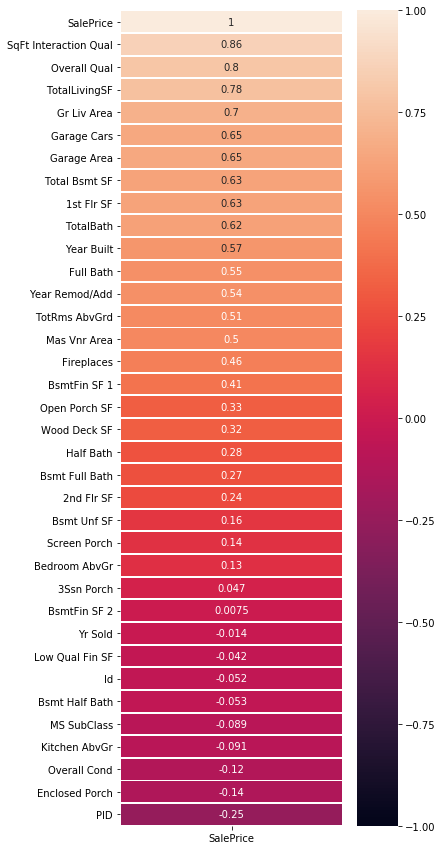

In [40]:
#Look at all corrilations to Sale Price

cor = train.corr()

plt.figure(figsize=(5,15))
sns.heatmap(cor[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1, 
            linecolor='white');

In [41]:
#code inspiration from Heather

cor_target = abs(cor['SalePrice'])
relevant_features = cor_target[cor_target > 0.5]
relevant_features.sort_values()

relevant_df = pd.DataFrame(relevant_features)

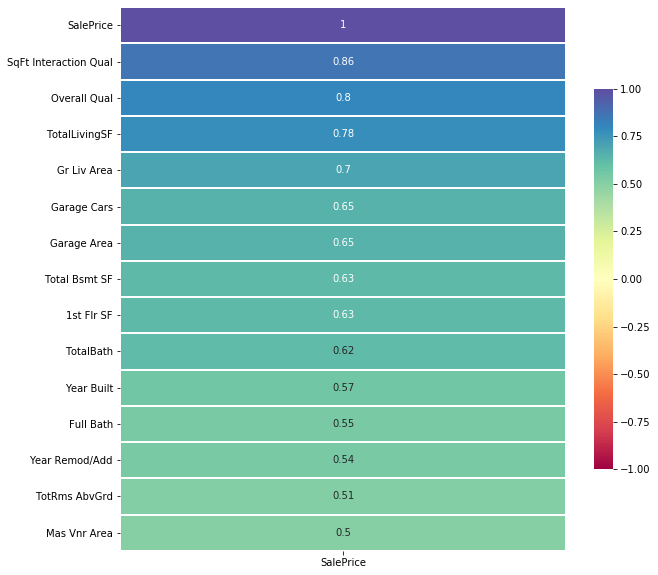

In [42]:
#Plotting relevant features

plt.figure(figsize=(10,10))
sns.heatmap(relevant_df.sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = "Spectral",
            linewidths=1, 
            linecolor='white',
            cbar_kws={"shrink": .70})

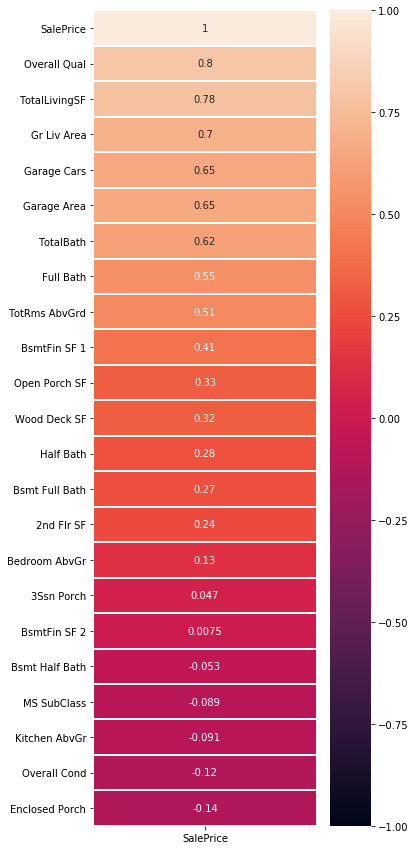

In [43]:
#Look at all corrilations to Sale Price

TCBcor = TCB_df.corr()

plt.figure(figsize=(5,15))
sns.heatmap(TCBcor[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1, 
            linecolor='white')

In [44]:
# Finding high corrilation features that contracting company can do

tcb_cor_target = abs(TCBcor['SalePrice'])
tcb_relevant_features = tcb_cor_target[tcb_cor_target > 0.5]
tcb_relevant_features.sort_values()

tcb_relevant_df = pd.DataFrame(tcb_relevant_features)

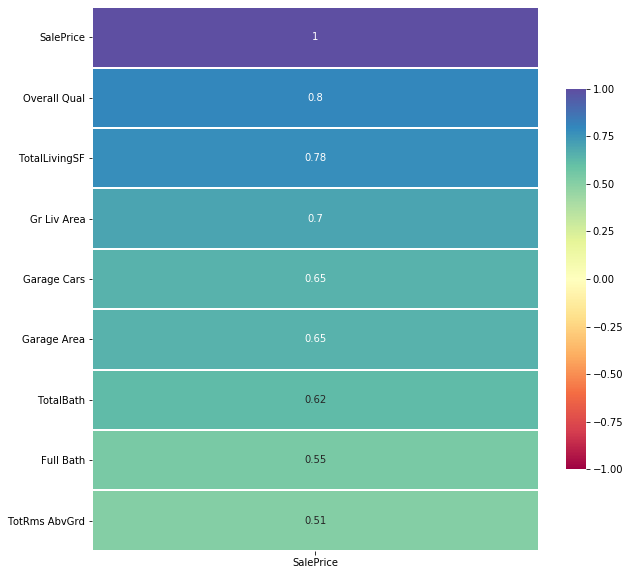

In [45]:
#Plotting relevant features

plt.figure(figsize=(10,10))
sns.heatmap(tcb_relevant_df.sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = "Spectral",
            linewidths=1, 
            linecolor='white',
            cbar_kws={"shrink": .70})

**Checking independance**

In [46]:
print(train[["Year Built","Year Remod/Add"]].corr())  
#High corrilation so I will drop one 
#Keep Year Build as it's corrilation with Sales Price is Higher

print(train[["Overall Qual","TotalLivingSF"]].corr())
#High corrilation so I will drop one 
#Keep Overall Qual as it's corrilation with Sales Price is Higher

print(train[["Garage Area","Garage Cars"]].corr())
#High corrilation so I will drop one 
#Keep Garage Area as it's corrilation with Sales Price is Higher

print(train[["1st Flr SF","Total Bsmt SF"]].corr())
#High corrilation so I will drop one 
#Keep Total Bsmt SF as it's corrilation with Sales Price is Higher

print(train[["TotalBath","Gr Liv Area"]].corr())
#High corrilation so I will drop one 
#Keep TotalBath as it's corrilation with Sales Price is Higher

                Year Built  Year Remod/Add
Year Built        1.000000        0.632592
Year Remod/Add    0.632592        1.000000
               Overall Qual  TotalLivingSF
Overall Qual       1.000000       0.639794
TotalLivingSF      0.639794       1.000000
             Garage Area  Garage Cars
Garage Area     1.000000     0.892032
Garage Cars     0.892032     1.000000
               1st Flr SF  Total Bsmt SF
1st Flr SF       1.000000       0.894571
Total Bsmt SF    0.894571       1.000000
             TotalBath  Gr Liv Area
TotalBath     1.000000     0.584645
Gr Liv Area   0.584645     1.000000


In [47]:
#High Independance
print(train[["Garage Area","Gr Liv Area"]].corr())
print(train[["Mas Vnr Area","Year Built"]].corr())

             Garage Area  Gr Liv Area
Garage Area     1.000000     0.486311
Gr Liv Area     0.486311     1.000000
              Mas Vnr Area  Year Built
Mas Vnr Area      1.000000    0.316717
Year Built        0.316717    1.000000


In [49]:
print(TCB_df[['TotRms AbvGrd', 'Overall Qual']].corr()) #low corrilation
print(TCB_df[['Gr Liv Area', 'Garage Area']].corr()) #high corrilation, keep 'Gr Liv Area'
print(TCB_df[['Garage Cars', 'Gr Liv Area']].corr())  #low corrilation
print(TCB_df[['Full Bath', 'TotalBath']].corr()) #high corrilation, keep total bath

               TotRms AbvGrd  Overall Qual
TotRms AbvGrd       1.000000      0.391821
Overall Qual        0.391821      1.000000
             Gr Liv Area  Garage Area
Gr Liv Area     1.000000     0.486311
Garage Area     0.486311     1.000000
             Garage Cars  Gr Liv Area
Garage Cars     1.000000     0.483905
Gr Liv Area     0.483905     1.000000
           Full Bath  TotalBath
Full Bath   1.000000   0.712082
TotalBath   0.712082   1.000000


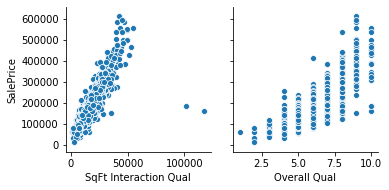

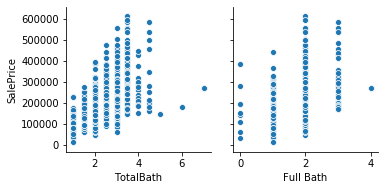

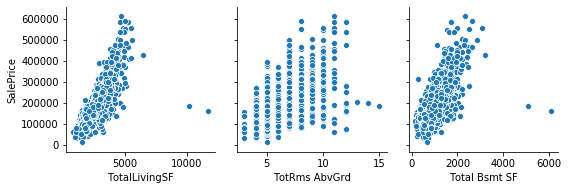

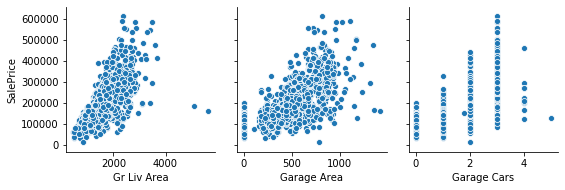

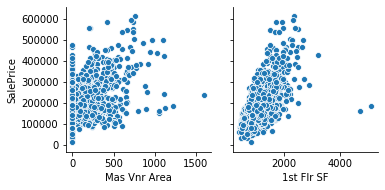

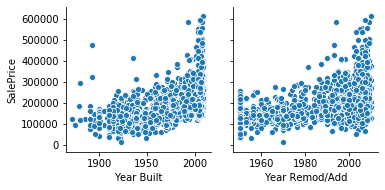

In [48]:
#Highest corrilations are SqFt Interaction Qual, Overall Qual, Garage Area, TotalBath,

sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['SqFt Interaction Qual', 'Overall Qual']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['TotalBath', 'Full Bath']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['TotalLivingSF','TotRms AbvGrd','Total Bsmt SF']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Gr Liv Area','Garage Area','Garage Cars']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Mas Vnr Area','1st Flr SF']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Year Built' ,'Year Remod/Add']);

# Pre Processing & Modeling

**Feature and Model Selection**

Features to score chosen by LASSO: 'PID', 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
       'TotalLivingSF', 'SqFt Interaction Qual', 'TotalBath',
       'Kitchen Qual_Ex', 'Kitchen Qual_TA', 'BsmtFin Type 2_Unf',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_Unf', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_No', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_N/A', 'Garage Finish_Fin',
       'Garage Finish_N/A', 'Garage Finish_Unf', 'Garage Qual_Gd',
       'Garage Qual_N/A', 'Garage Cond_N/A'

As the output of my project will be the numeric 'Sale Price', I will use linear regression and multiple linear regression modeling algorithm to evaluate the data given to me. 

I will log salesprice before testing as there are so many outliers for more accutate results.
I will scale data as the units of measurements are different for the features chose. 

The success of my modeles will be evaluated by the regression metric 𝑅2. I will use R2 as it is easily interpratable and does not depend on the scale of "Sales Price".

**Dummy Columns**

In [50]:
train = pd.get_dummies(train, columns = ['House Style','Kitchen Qual','Bsmt Cond','BsmtFin Type 2','BsmtFin Type 1', 
                                        'Bsmt Exposure','Garage Type','Garage Finish','Garage Qual','Garage Cond'])

                                      
test = pd.get_dummies(test, columns = ['House Style','Kitchen Qual','Bsmt Cond','BsmtFin Type 2','BsmtFin Type 1',
                                       'Bsmt Exposure','Garage Type','Garage Finish','Garage Qual','Garage Cond'])

**Initiate Model**

In [51]:
#All numeric columns: Before Lasso
# X = train._get_numeric_data().drop(columns='SalePrice')
# y = train['SalePrice']

In [52]:
#After Lasso
features= ['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
       'TotalLivingSF', 'SqFt Interaction Qual', 'TotalBath',
       'Kitchen Qual_Ex', 'Kitchen Qual_TA', 'BsmtFin Type 2_Unf',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_Unf', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_No', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Garage Type_N/A', 'Garage Finish_Fin',
       'Garage Finish_N/A', 'Garage Finish_Unf', 'Garage Qual_Gd',
       'Garage Qual_N/A', 'Garage Cond_N/A']

X = train[features]

y = train['SalePrice']

In [53]:
# If logging
#train['SalePrice'] = train['SalePrice'].map(np.log)

**Train/test split data**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
# If logging
# y_train_log = y_train.map(np.log)
# y_test_log = y_test.map(np.log)

**Scale data**

In [56]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Instantiate model**

In [57]:
lr = LinearRegression()

**Establishing baseline score**

In [58]:
cross_val_score(lr, X_train, y_train).mean()

0.8050226854332333

**Fit model**

In [59]:
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluate Model**

In [60]:
lr.score(Xs_train, y_train)

0.8470017651478623

In [61]:
lr.score(X_test, y_test)

0.872651760406306

In [62]:
cross_val_score(lr,Xs_train, y_train).mean() 

0.805012983783354

In [63]:
#If logging
# cross_val_score(lr,Xs_train, y_train_log).mean() = 0.8635515856622098
# lr.score(X_test, y_test_log) = 0.8921485005716413
# lr.score(Xs_train, y_train_log) = 0.8758816589063017

**Score Interpretation**

As the test and train scores are similar I can assume that there is Low Variance and low overfitting. 

As cross val score is .07 points from test score there might be a sampeling error. To correct this I could select a different state for test train split. This might also indicate High Bias.

In [77]:
pd.DataFrame({
    'var': X.columns,
    'coef val': lr.coef_
}).set_index('var').sort_values('coef val')

,coef val
var,
SqFt Interaction Qual,-11510.247438
MS SubClass,-8267.288981
Bsmt Exposure_No,-3793.981517
Kitchen AbvGr,-2887.052093
BsmtFin Type 1_Unf,-2688.676953
Kitchen Qual_TA,-2642.996941
PID,-2557.392932
Bsmt Half Bath,-2325.458622
Garage Type_CarPort,-1325.599185


**Coefficient Interpretations**

Holding all else constant:

Bumping up the Kitchen quality of a home increases it's value approximately $12,739.

Adding an above ground addition can increase the home value of $11,083.

Adding an additional bedroom above ground will increase the value of the home $6,544 (3087+3457)

In [64]:
sum(lr.coef_)

98433.5613111722

**LASSO Regression**

In [65]:
from sklearn.linear_model import Lasso, LassoCV

In [66]:
lasso = Lasso(alpha=282) 
lasso.fit(Xs_train, y_train)
lasso.score(Xs_train, y_train), lasso.score(X_test, y_test)

(0.8506604942948295, 0.8780077036791422)

(0.8506604942948295, 0.8780077036791422)

In [68]:
coef_df = pd.DataFrame({
    'var': X.columns,
    'coef val': lasso.coef_
})
coef_df[coef_df['coef val'] != 0]['var'].values

array(['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
       'TotalLivingSF', 'TotalBath', 'Kitchen Qual_Ex', 'Kitchen Qual_TA',
       'BsmtFin Type 2_Unf', 'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_Unf',
       'Bsmt Exposure_Gd', 'Bsmt Exposure_No', 'Garage Type_BuiltIn',
       'Garage Type_CarPort', 'Garage Type_Detchd', 'Garage Type_N/A',
       'Garage Finish_Fin', 'Garage Finish_N/A', 'Garage Qual_Gd',
       'Garage Qual_N/A', 'Garage Cond_N/A'], dtype=object)

In [69]:
lcv = LassoCV()
lcv.fit(Xs_train, y_train)
lcv.score(Xs_train, y_train), lcv.score(X_test, y_test)

(0.8462320708282816, 0.8776571267080878)

In [70]:
lcv.alpha_

282.5643759965872

**Make Predictions**

In [71]:
pred = lr.predict(X_test)

**Inferential Visualizations**

In [72]:
residuals = y_test - pred
residuals

911      14181.208021
1724    -39630.165456
423      19032.593188
1112     10630.460629
1135    -43688.572407
1027     13701.660093
1984     45642.360784
2025      4190.360566
789        229.282881
1633    -21492.040659
460      16224.846249
497      -1821.600248
2038     -6427.461113
1471    -20952.933276
1533      3583.285019
1218    -10370.482289
127      -2961.345524
841      26443.216583
1632    -31971.047919
1364     -9253.648570
403      14539.333297
1564    -16268.477439
527      15525.795725
1277     32040.700423
358       7011.239062
1483    -10805.848597
313      30009.843710
545       5431.718054
885       9597.766724
1215      7335.608053
539     -23051.735706
1057    -11032.834606
1324     27621.955831
2003     11328.527151
1970     63087.801588
1589      8295.252568
71       24890.770085
1679    -17231.327706
1710    -11893.105515
543      27013.123691
970      15063.631925
777     -10003.560607
1259    -35287.079168
1432      9230.069715
491      15878.339303
1574    -2

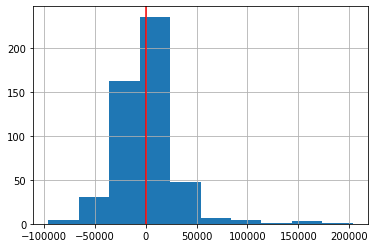

In [73]:
residuals.hist()
plt.axvline(0, color='r')

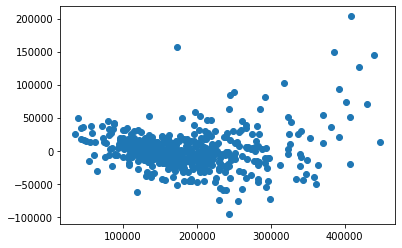

In [74]:
plt.scatter(pred, residuals)

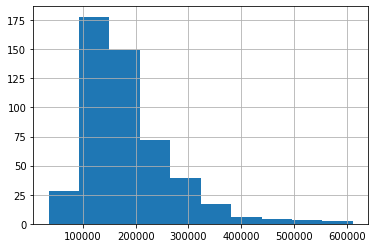

In [75]:
y_test.hist()

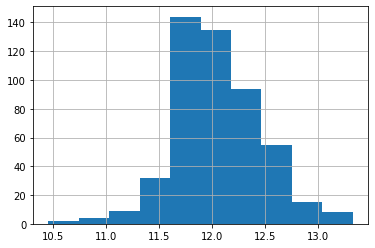

In [76]:
y_test.map(np.log).hist()

**Risiduals:**
Look pretty symetrical with a positive skew so model is consistantly underguessing.
We dont have the same variance from left to right so there is Heteroskadasticity. 

As we dont have a normal distribution of our residuals along with heteroskadasticity, I could improve score with Logging Sales Price. (However I dont have the knowledge yet to do so and interpret results).

# Buisness Reccomendations

My reccomendation to TCB General Contractors would be to focus their new marketing campain around Kitchen Renovation, above ground additions, and Garage Addition as they generally add the most value to a home. I would not focus on the addition of a wood deck or basement refinishing as the cost of the deck will be more to the homeowner than the value added to their home.

Kitchen Renovation +$12,739

Above Ground Additions +$11,083

Garage Addition +$8,771/car

Given similar data I do think this model will generalize to other cities. 